#### Importing dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### Reading dataset

In [2]:
wine = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv',sep = ';', header =0)

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Exploring the dataset

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

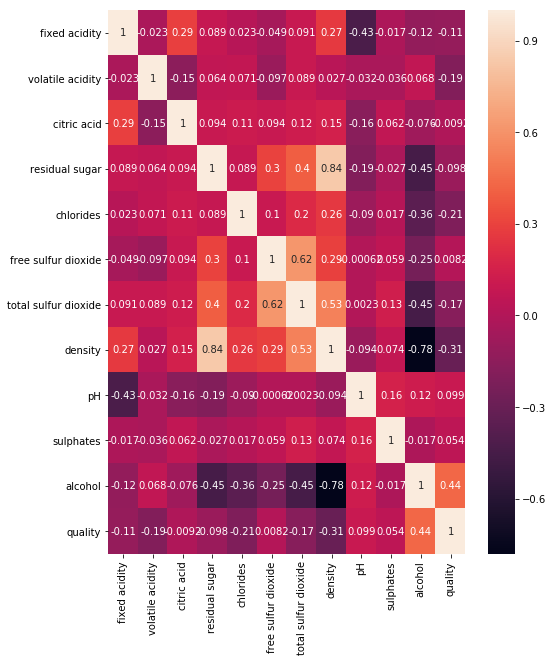

In [7]:
plt.figure(figsize= (8,10))
sns.heatmap(wine.corr(), annot = True)

In [8]:
wine.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [9]:
def func(r):
    if r <= 3:
        return 1
    elif r<= 6:
        return 2
    else:
        return 3

wine.quality = wine.quality.map(func)

In [10]:
wine['quality'].value_counts()

2    3818
3    1060
1      20
Name: quality, dtype: int64

In [11]:
#Class imbalance

In [12]:
from imblearn.over_sampling import  SMOTE

In [13]:
smote = SMOTE()

In [14]:
X = wine.drop(columns=['quality'])

In [15]:
y = wine['quality']

#### Before sampling

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtree_before = DecisionTreeClassifier()

In [20]:
trainX, testX, trainY, testY = train_test_split(X,y)

In [22]:
dtree_before.fit(trainX, trainY)

DecisionTreeClassifier()

In [23]:
pred_before = dtree_before.predict(testX)

In [24]:
print(confusion_matrix(pred_before,testY))

[[  0   3   0]
 [  3 833 114]
 [  2 113 157]]


In [25]:
dtree_before.score(testX,testY)

0.8081632653061225

#### After sampling

In [26]:
feature, target = smote.fit_sample(X,y)

In [27]:
trainX, testX, trainY, testY = train_test_split(feature, target)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree = DecisionTreeClassifier()

In [30]:
dtree.fit(trainX, trainY)

DecisionTreeClassifier()

In [31]:
pred = dtree.predict(testX)

In [32]:
dtree.score(testX,testY)

0.8868715083798883

In [33]:
print(confusion_matrix(pred,testY))

[[942  22   7]
 [ 17 786 136]
 [  4 138 812]]
